In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [236]:
sulfurDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/SulfurDiOxide_2019.csv")
sulfurDiOxide2020.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,39137.000000,39137.0,39137.000000,39137.000000,39137.0,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,15716.000000,39137.000000,35524.000000
mean,19568.000000,36.0,54.144952,160.826686,42401.0,2.093134,42.602913,-75.372735,66.366329,97.872039,0.437653,1.674888,11.698393,1.810003,491.215985,31864.440941
std,11298.023079,0.0,34.756434,343.697389,0.0,1.583848,1.331558,1.922523,106.824960,8.221113,1.934337,10.288578,8.426586,9.149359,172.225215,9730.327820
min,0.000000,36.0,1.000000,2.000000,42401.0,1.000000,40.736140,-79.318810,1.000000,0.000000,-0.700000,-0.700000,0.000000,0.000000,60.000000,10580.000000
25%,9784.000000,36.0,29.000000,4.000000,42401.0,1.000000,41.455890,-76.702600,8.000000,100.000000,0.028472,0.100000,4.000000,0.000000,560.000000,27060.000000
50%,19568.000000,36.0,55.000000,5.000000,42401.0,1.000000,42.613199,-74.516250,24.000000,100.000000,0.150000,0.300000,11.000000,0.000000,560.000000,35620.000000
75%,29352.000000,36.0,89.000000,110.000000,42401.0,3.000000,43.449570,-73.821530,24.000000,100.000000,0.320833,0.700000,21.000000,0.000000,560.000000,36300.000000
max,39136.000000,36.0,109.000000,1015.000000,42401.0,5.000000,44.965412,-73.057540,288.000000,100.000000,52.741667,443.200000,23.000000,105.000000,560.000000,46540.000000


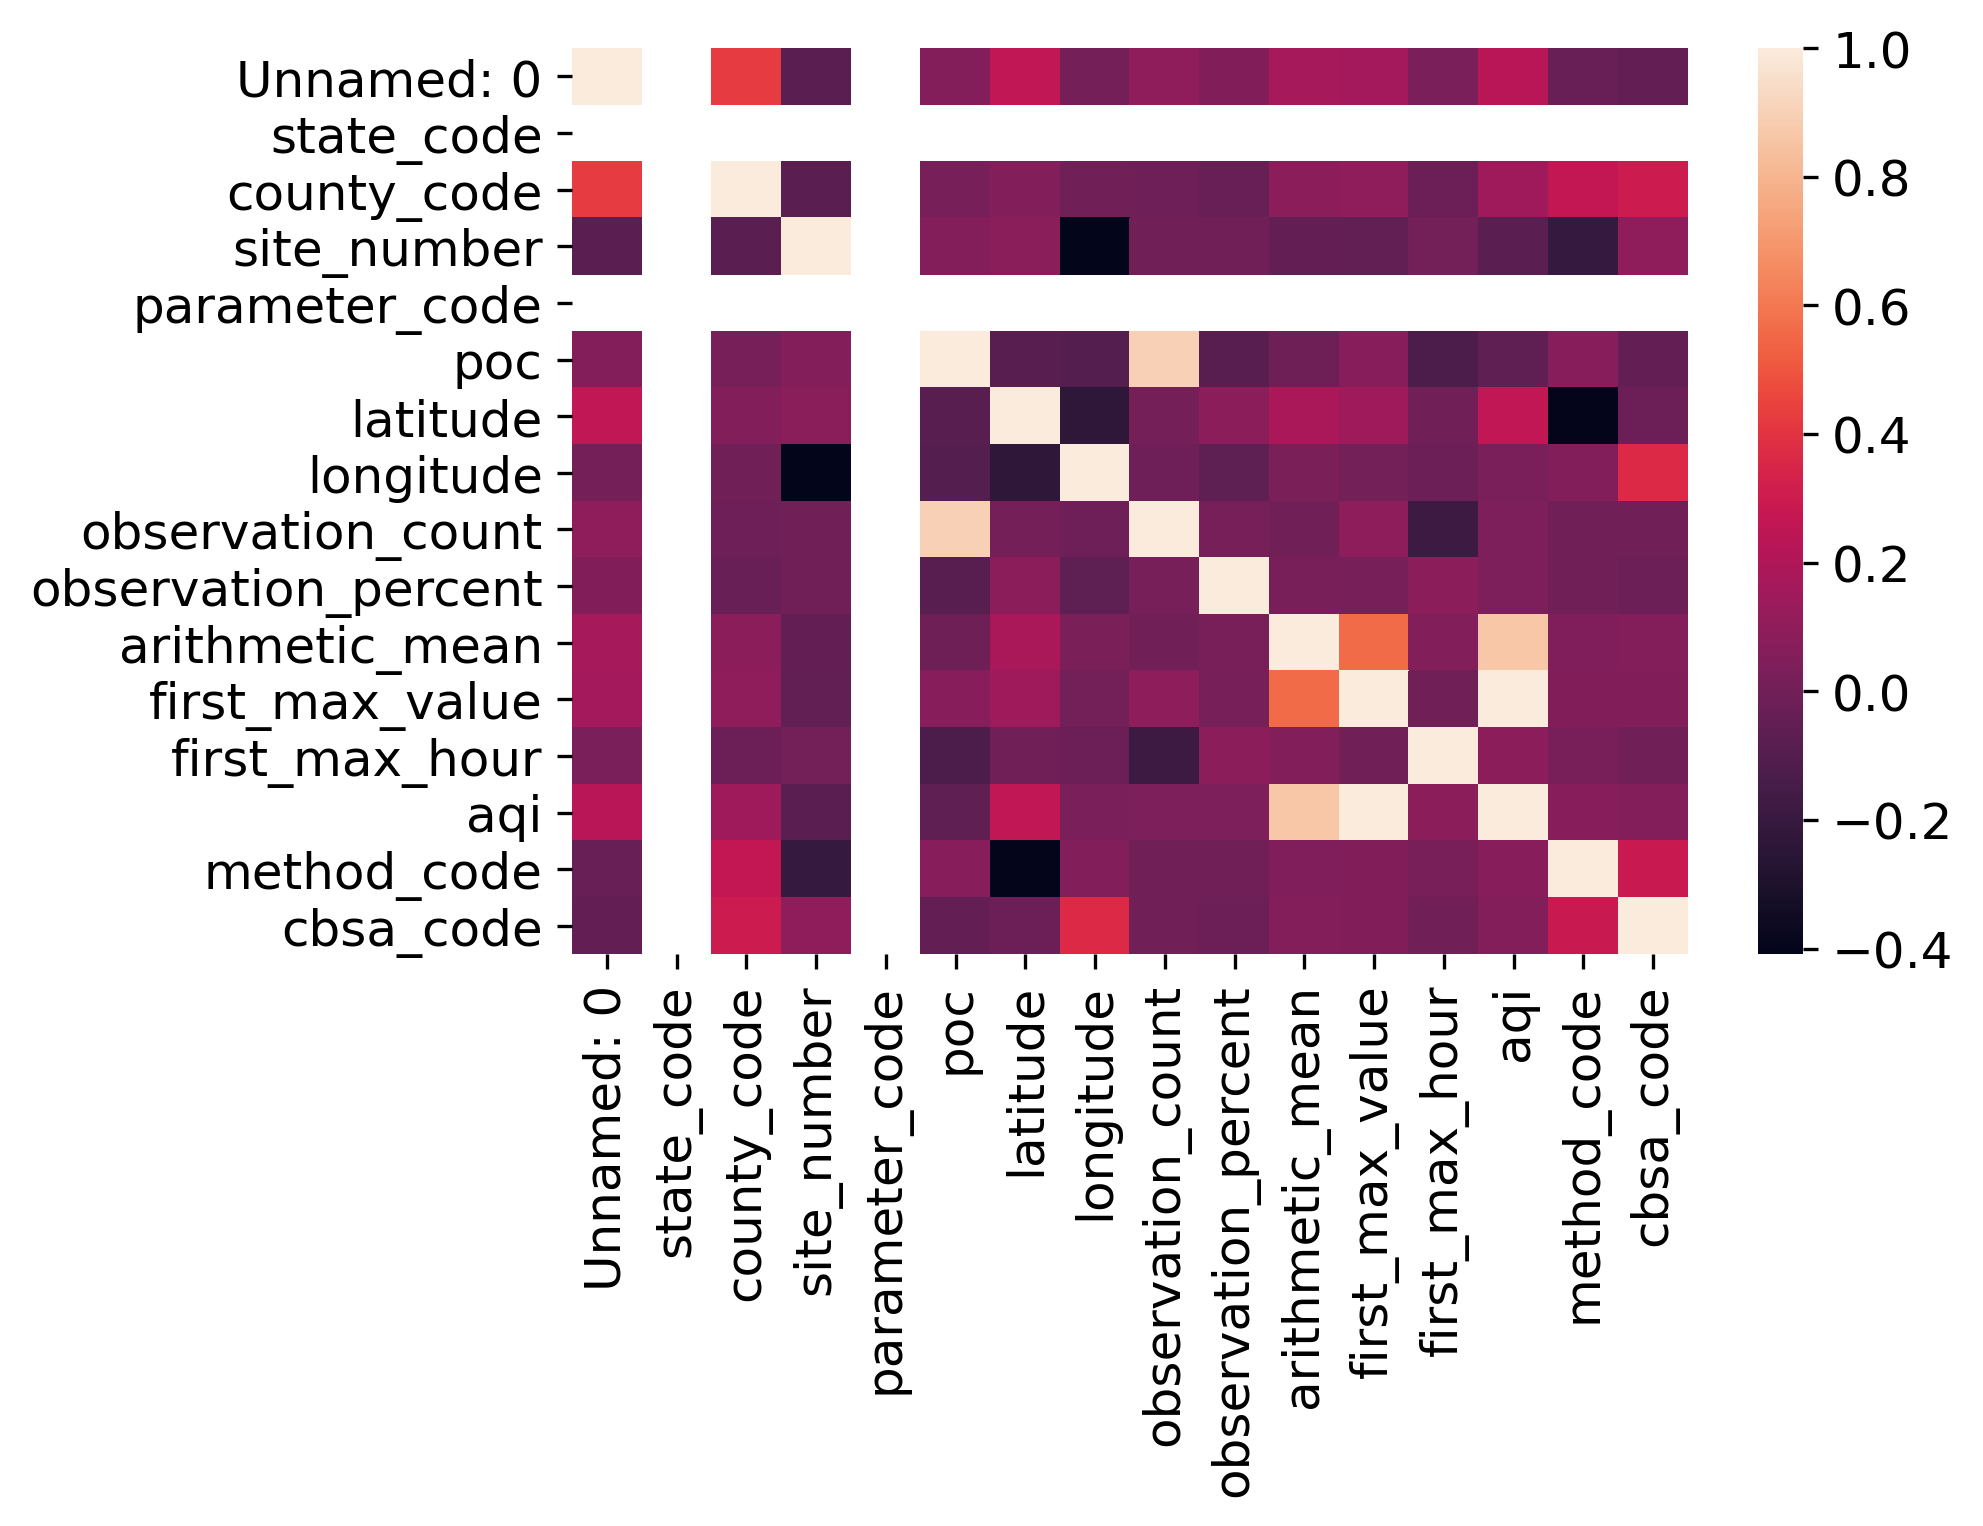

In [237]:

corr=sulfurDiOxide2020.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [238]:
missingValueCount=sulfurDiOxide2020.isnull().sum()

print(missingValueCount)

Unnamed: 0                 0
state_code                 0
county_code                0
site_number                0
parameter_code             0
poc                        0
latitude                   0
longitude                  0
datum                      0
parameter                  0
sample_duration            0
pollutant_standard      7785
date_local                 0
units_of_measure           0
event_type                 0
observation_count          0
observation_percent        0
validity_indicator         0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
aqi                    23421
method_code                0
method                     0
local_site_name            0
site_address               0
state                      0
county                     0
city                       0
cbsa_code               3613
cbsa                    3613
date_of_last_change        0
dtype: int64


In [239]:
sulfurDiOxide2020.shape
print(sulfurDiOxide2020.dtypes)
print(sulfurDiOxide2020['method_code'].unique())
print(sulfurDiOxide2020['pollutant_standard'].unique())
grouped=sulfurDiOxide2020.groupby(['pollutant_standard'])
print(sulfurDiOxide2020['pollutant_standard'].count())
print(sulfurDiOxide2020['sample_duration'].unique())
print(sulfurDiOxide2020['units_of_measure'].unique())
print(sulfurDiOxide2020['event_type'].unique())

list(sulfurDiOxide2020.columns) 

Unnamed: 0               int64
state_code               int64
county_code              int64
site_number              int64
parameter_code           int64
poc                      int64
latitude               float64
longitude              float64
datum                   object
parameter               object
sample_duration         object
pollutant_standard      object
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
validity_indicator      object
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method                  object
local_site_name         object
site_address            object
state                   object
county                  object
city                    object
cbsa_code              float64
cbsa                    object
date_of_last_change     object
dtype: o

['Unnamed: 0',
 'state_code',
 'county_code',
 'site_number',
 'parameter_code',
 'poc',
 'latitude',
 'longitude',
 'datum',
 'parameter',
 'sample_duration',
 'pollutant_standard',
 'date_local',
 'units_of_measure',
 'event_type',
 'observation_count',
 'observation_percent',
 'validity_indicator',
 'arithmetic_mean',
 'first_max_value',
 'first_max_hour',
 'aqi',
 'method_code',
 'method',
 'local_site_name',
 'site_address',
 'state',
 'county',
 'city',
 'cbsa_code',
 'cbsa',
 'date_of_last_change']

In [240]:


sulfurDiOxide2020New=sulfurDiOxide2020[['date_local','county_code','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi','method_code',
                                'local_site_name','state']].copy()

sulfurDiOxide2020New = sulfurDiOxide2020New[sulfurDiOxide2020New['pollutant_standard'] == "SO2 1-hour 2010"] 

print(sulfurDiOxide2020New['method_code'].unique())
print(sulfurDiOxide2020New.shape)

#----begin converting date_local column type from object to datetime64-------

sulfurDiOxide2020New['date_local']=pd.to_datetime(sulfurDiOxide2020New['date_local'])
# sulfurDiOxide2020New.index=sulfurDiOxide2020New['date_local']


#-----end converting date_local column type from object to datetime64
print(sulfurDiOxide2020New.isnull().sum())

                               



[560  60]
(7858, 13)
date_local            0
county_code           0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
method_code           0
local_site_name       0
state                 0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x23bcdd1d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23bcdd15460>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bcdd234f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23bcdd23850>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bcdd23bb0>],
 'means': []}

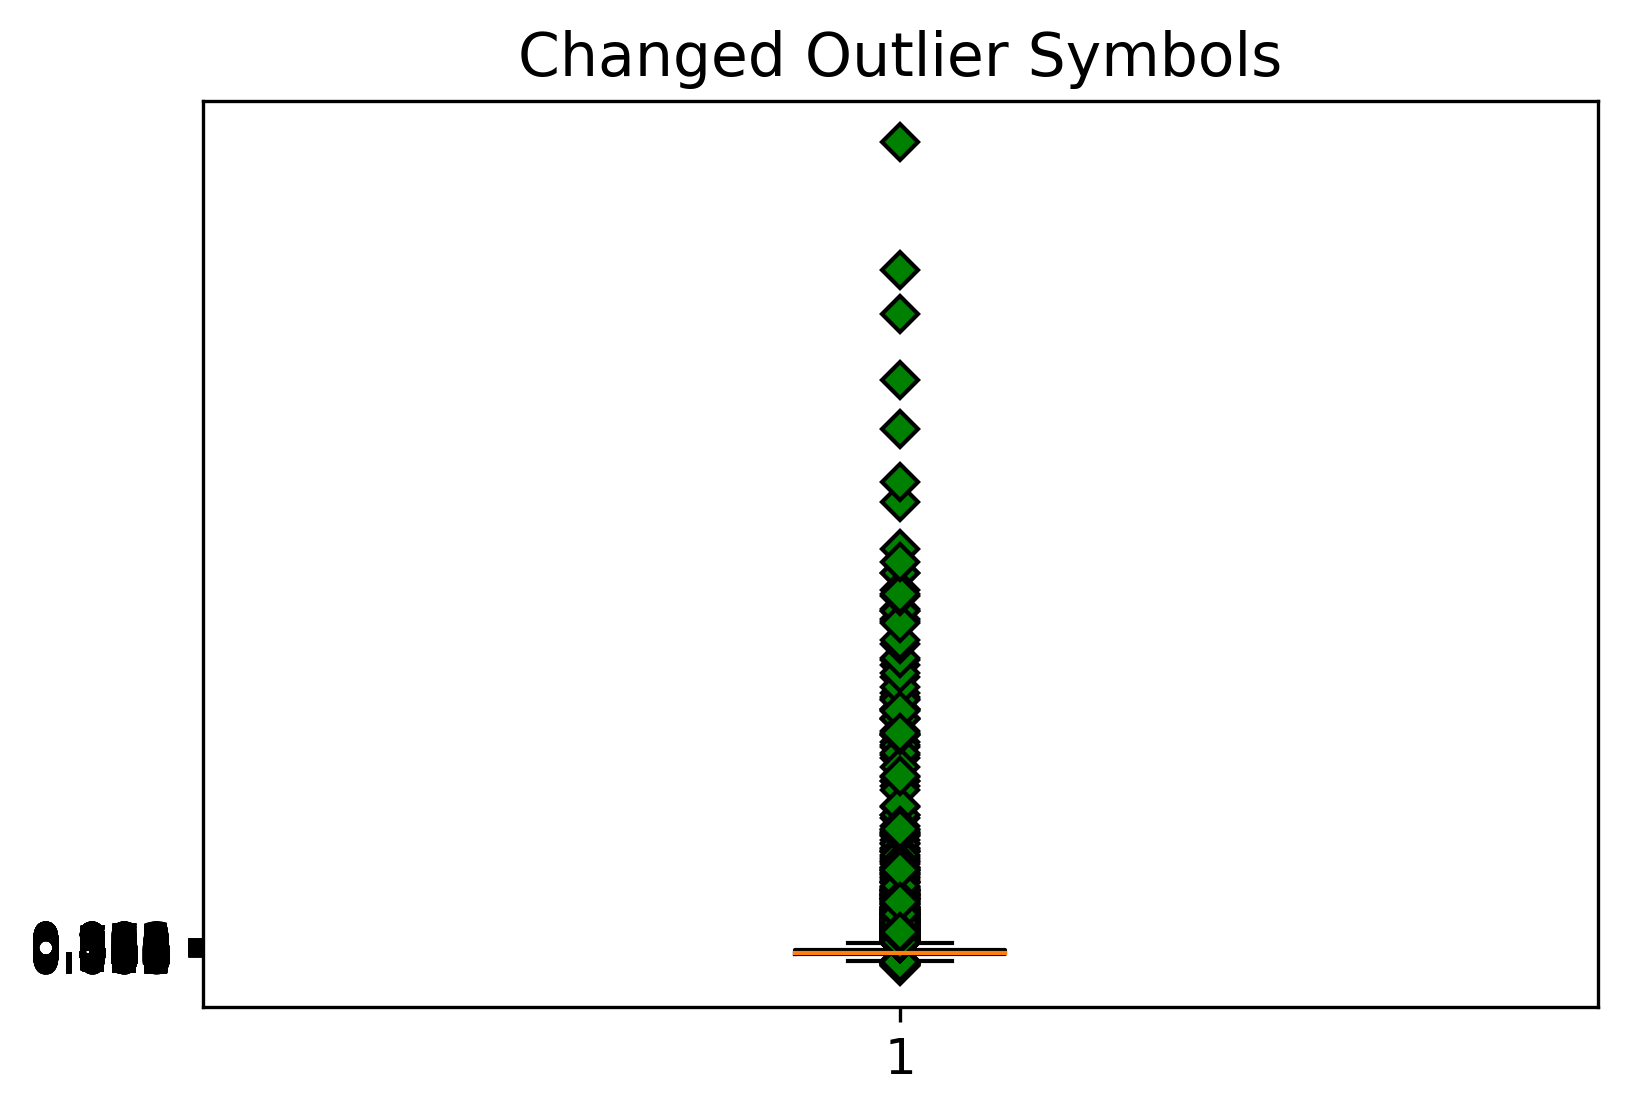

In [241]:
#box plot of arithmatic_mean

green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
plt.yticks(np.arange(0, 1, step=0.002))
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(sulfurDiOxide2020New['arithmetic_mean'], flierprops=green_diamond)

In [46]:
### count of different sites through out new york state###

# grouped=sulfurDiOxide2020New.groupby(['site_number'])
# print(grouped['site_number'].count())


site_number
3        700
4        366
5       1818
6        362
7        366
9        356
12       366
110      366
124      366
133      362
1007     366
1014     365
1015     364
Name: site_number, dtype: int64


In [242]:
######Remove Invalid Values ######

print(sulfurDiOxide2020New['validity_indicator'].unique())
grouped=sulfurDiOxide2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


sulfurDiOxide2020New = sulfurDiOxide2020New[sulfurDiOxide2020New['validity_indicator'] == "Y"] 
# sulfurDiOxide2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/sulfur_di_oxide2020.csv')




['Y' 'N']
validity_indicator
N      75
Y    7783
Name: validity_indicator, dtype: int64


In [243]:
#duplicate check

# duplicated_rows <- data_frame(duplicated = duplicated(sulfurDiOxide2020New), row = 1:nrow(sulfurDiOxide2020New)) %>%
#     filter(duplicated == T)

duplicate = sulfurDiOxide2020New[sulfurDiOxide2020New.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)
    

Empty DataFrame
Columns: [date_local, county_code, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, method_code, local_site_name, state]
Index: []


In [244]:
sulfurDiOxide2020New.describe()

,county_code,site_number,arithmetic_mean,first_max_value,aqi,method_code
count,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000,7783.000000
mean,54.163819,160.697160,0.442092,1.661673,1.825517,491.645895
std,34.768741,343.545791,1.938045,6.794778,9.192053,171.780558
min,1.000000,2.000000,-0.695833,-0.500000,0.000000,60.000000
25%,29.000000,4.000000,0.033333,0.200000,0.000000,560.000000
50%,55.000000,5.000000,0.154167,0.400000,0.000000,560.000000
75%,89.000000,110.000000,0.333333,0.800000,0.000000,560.000000
max,109.000000,1015.000000,52.741667,86.500000,105.000000,560.000000


2        0.062500
6        0.086364
10       0.070833
14       0.104167
18       0.070833
           ...   
32450    0.079167
32454    0.008333
32458    0.091667
32463    0.595833
32465    0.158333
Name: arithmetic_mean, Length: 6444, dtype: float64


<AxesSubplot:>

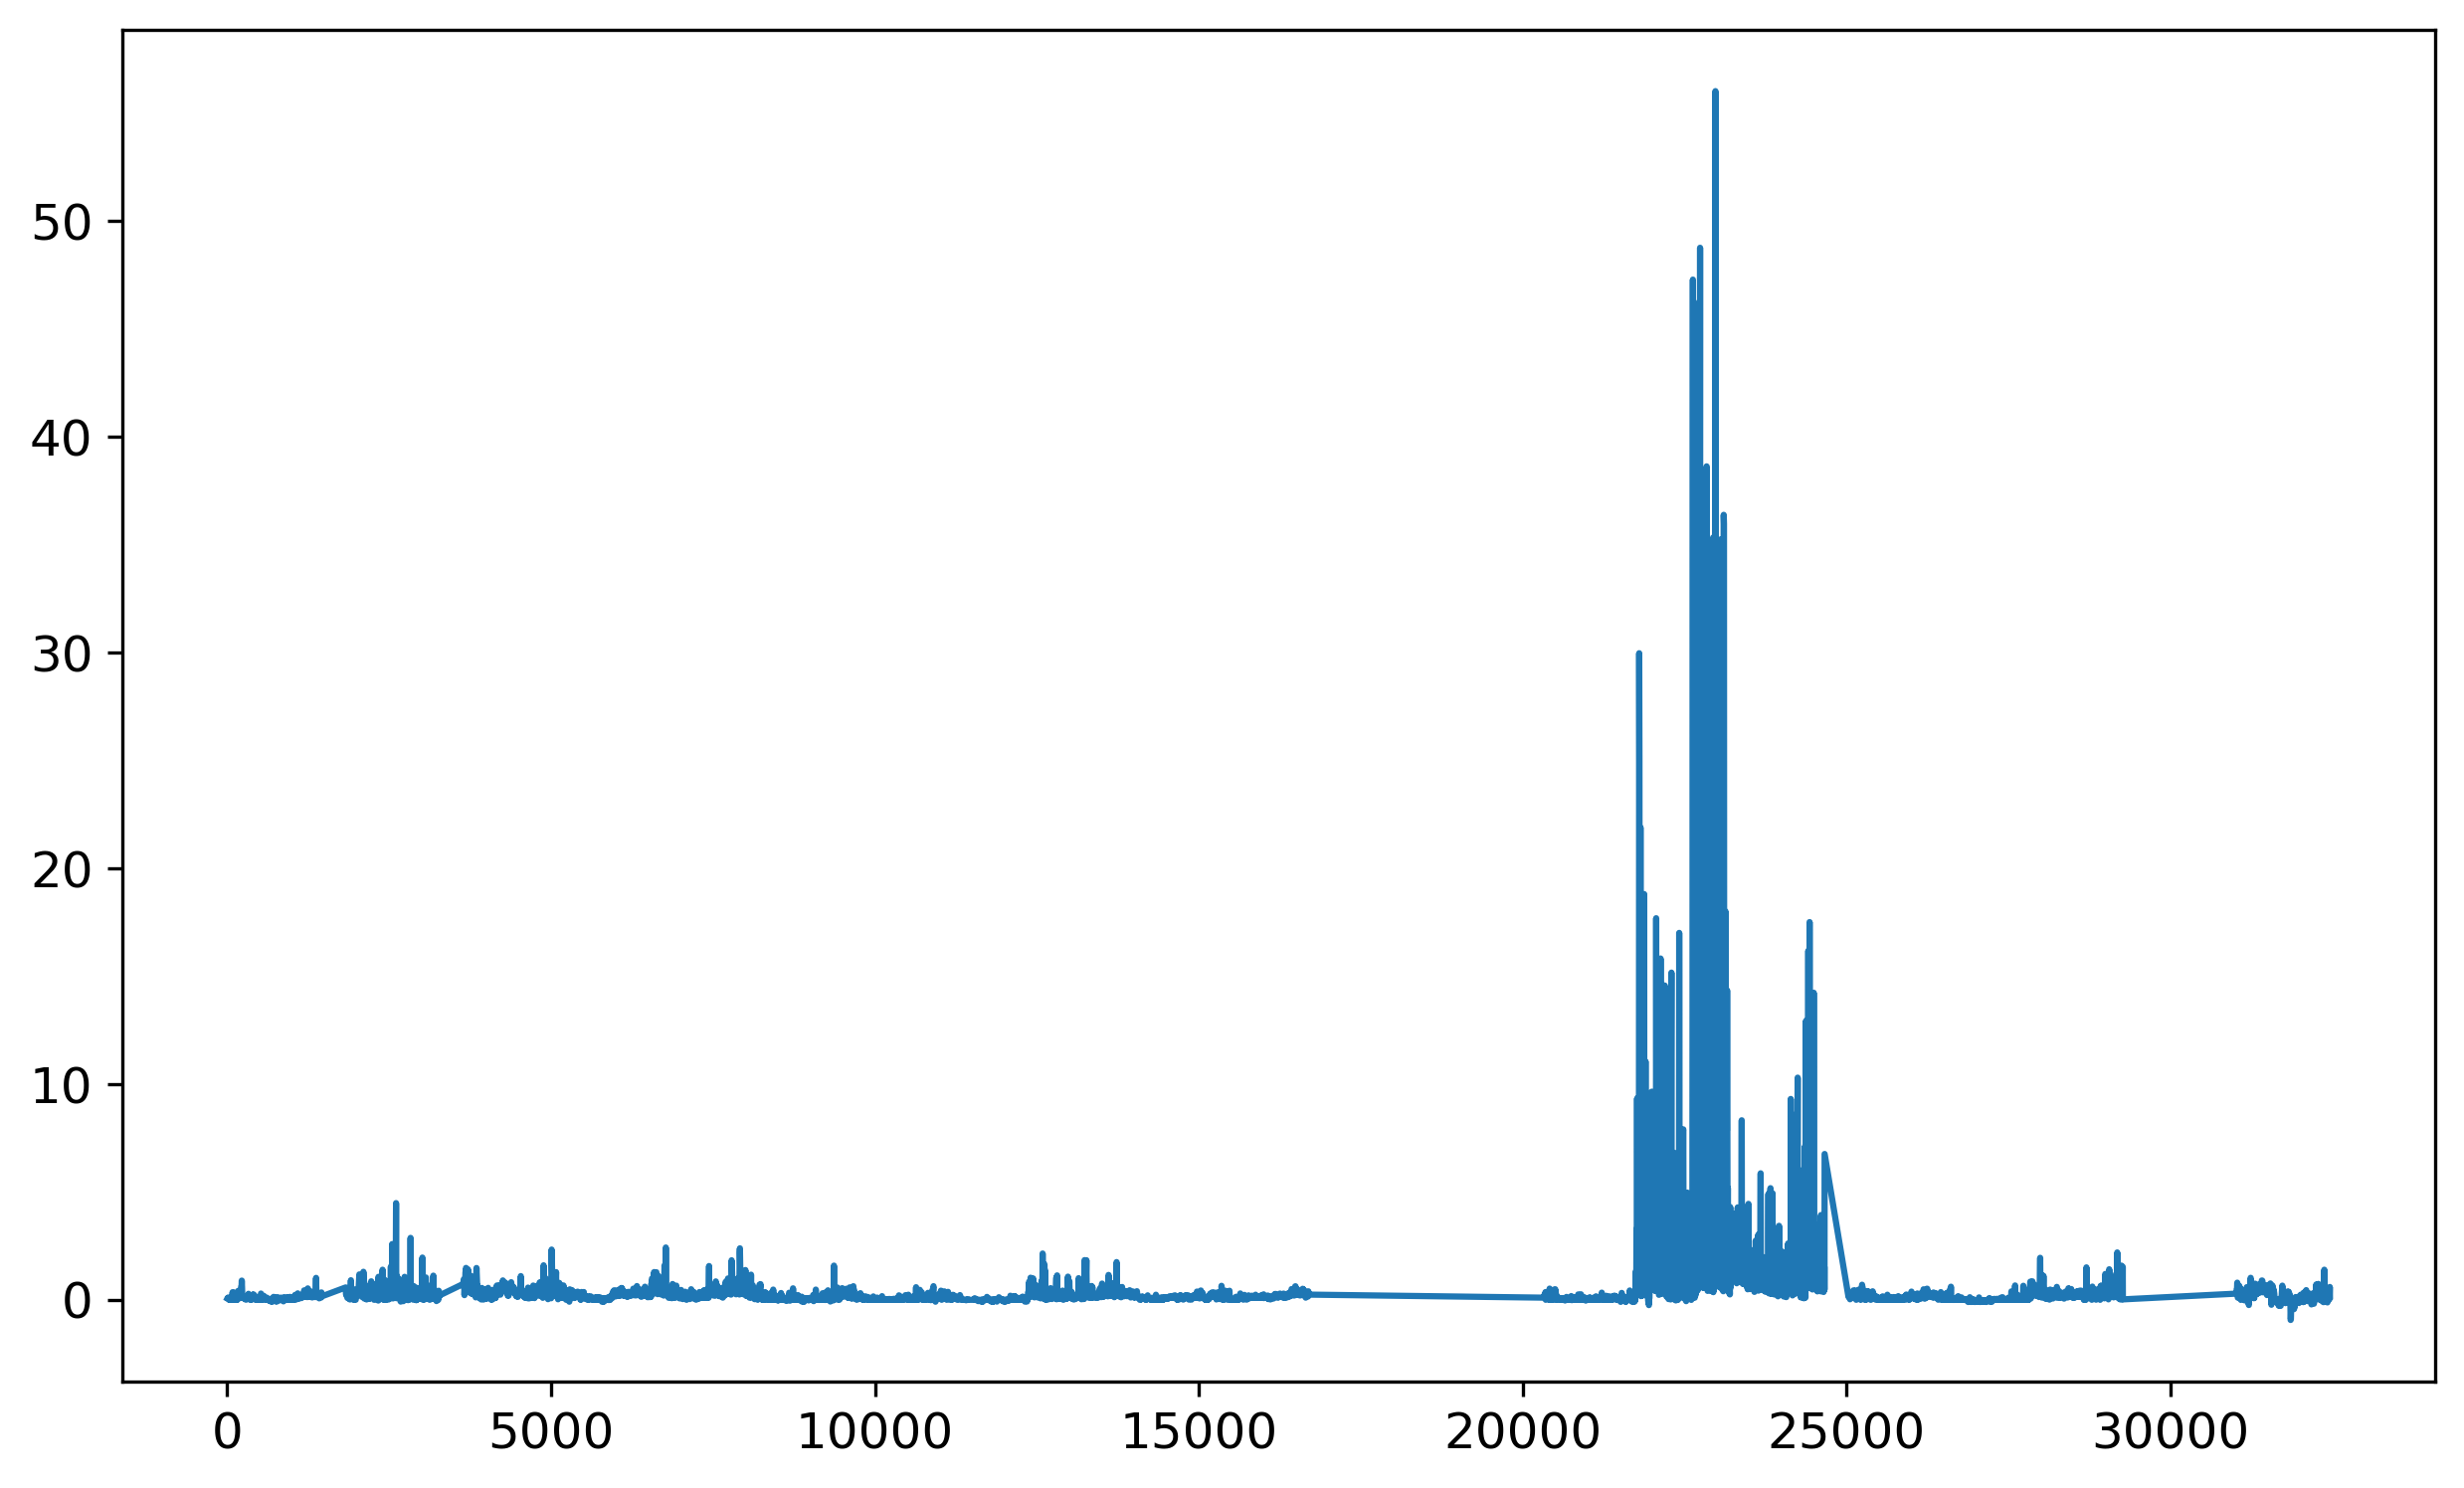

In [190]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(sulfurDiOxide2020New['date_local'].array, sulfurDiOxide2020New['arithmetic_mean'], color='tab:orange', label='Windspeed')
# plt.plot(x,y)
# plt.show()
print(sulfurDiOxide2020New['arithmetic_mean'])
goog=sulfurDiOxide2020New['arithmetic_mean']
goog.plot()

In [245]:
#removing outliers

#plot some graph

quartiles = np.percentile(sulfurDiOxide2020New['arithmetic_mean'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(mu)
print(sig)
print(sulfurDiOxide2020New.shape)
sulfurDiOxide2020New = sulfurDiOxide2020New.query('(arithmetic_mean > @mu - 5 * @sig) & (arithmetic_mean < @mu + 5 * @sig)')
print(sulfurDiOxide2020New.shape)
sulfurDiOxide2020New.describe()

0.154167
0.222
(7783, 13)
(7460, 13)


,county_code,site_number,arithmetic_mean,first_max_value,aqi,method_code
count,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000,7460.000000
mean,53.315282,165.335523,0.204785,0.642480,0.426542,489.289544
std,34.699427,348.230477,0.255815,1.091146,1.474489,174.239286
min,1.000000,2.000000,-0.695833,-0.500000,0.000000,60.000000
25%,29.000000,4.000000,0.029167,0.100000,0.000000,560.000000
50%,43.000000,5.000000,0.145455,0.300000,0.000000,560.000000
75%,89.000000,110.000000,0.304167,0.700000,0.000000,560.000000
max,109.000000,1015.000000,1.262500,17.600000,24.000000,560.000000


In [191]:
#removing outliers using robust z-score --- use this

#plot some graph
med=np.median(sulfurDiOxide2020New['arithmetic_mean'])
ma = stats.median_abs_deviation(sulfurDiOxide2020New['arithmetic_mean'])
mad=np.median(ma)
sulfurDiOxide2020New = sulfurDiOxide2020New.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(sulfurDiOxide2020New.shape)
sulfurDiOxide2020New.describe()

(5884, 13)


,county_code,site_number,arithmetic_mean,first_max_value,aqi,method_code
count,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000
mean,48.121346,207.843814,0.178541,0.493950,0.228586,500.091774
std,33.036702,381.497666,0.187001,0.658808,0.816033,162.387188
min,1.000000,3.000000,-0.454167,-0.300000,0.000000,60.000000
25%,27.000000,5.000000,0.029167,0.100000,0.000000,560.000000
50%,41.000000,7.000000,0.125000,0.300000,0.000000,560.000000
75%,79.000000,124.000000,0.279167,0.600000,0.000000,560.000000
max,103.000000,1015.000000,0.754167,8.700000,11.000000,560.000000


(array([  4.,   3.,   9.,   7.,   7.,  65.,  63.,  37.,  47.,  36.,  48.,
          0.,   0., 605.,   0.,   0., 130., 174., 210., 247., 338., 409.,
        676., 486., 615., 493., 397., 325., 254., 199.]),
 array([-0.76866751, -0.71270393, -0.65674035, -0.60077678, -0.5448132 ,
        -0.48884962, -0.43288604, -0.37692246, -0.32095888, -0.2649953 ,
        -0.20903173, -0.15306815, -0.09710457, -0.04114099,  0.01482259,
         0.07078617,  0.12674974,  0.18271332,  0.2386769 ,  0.29464048,
         0.35060406,  0.40656764,  0.46253122,  0.51849479,  0.57445837,
         0.63042195,  0.68638553,  0.74234911,  0.79831269,  0.85427626,
         0.91023984]),
 [<matplotlib.patches.Polygon at 0x23b8f4efa60>])

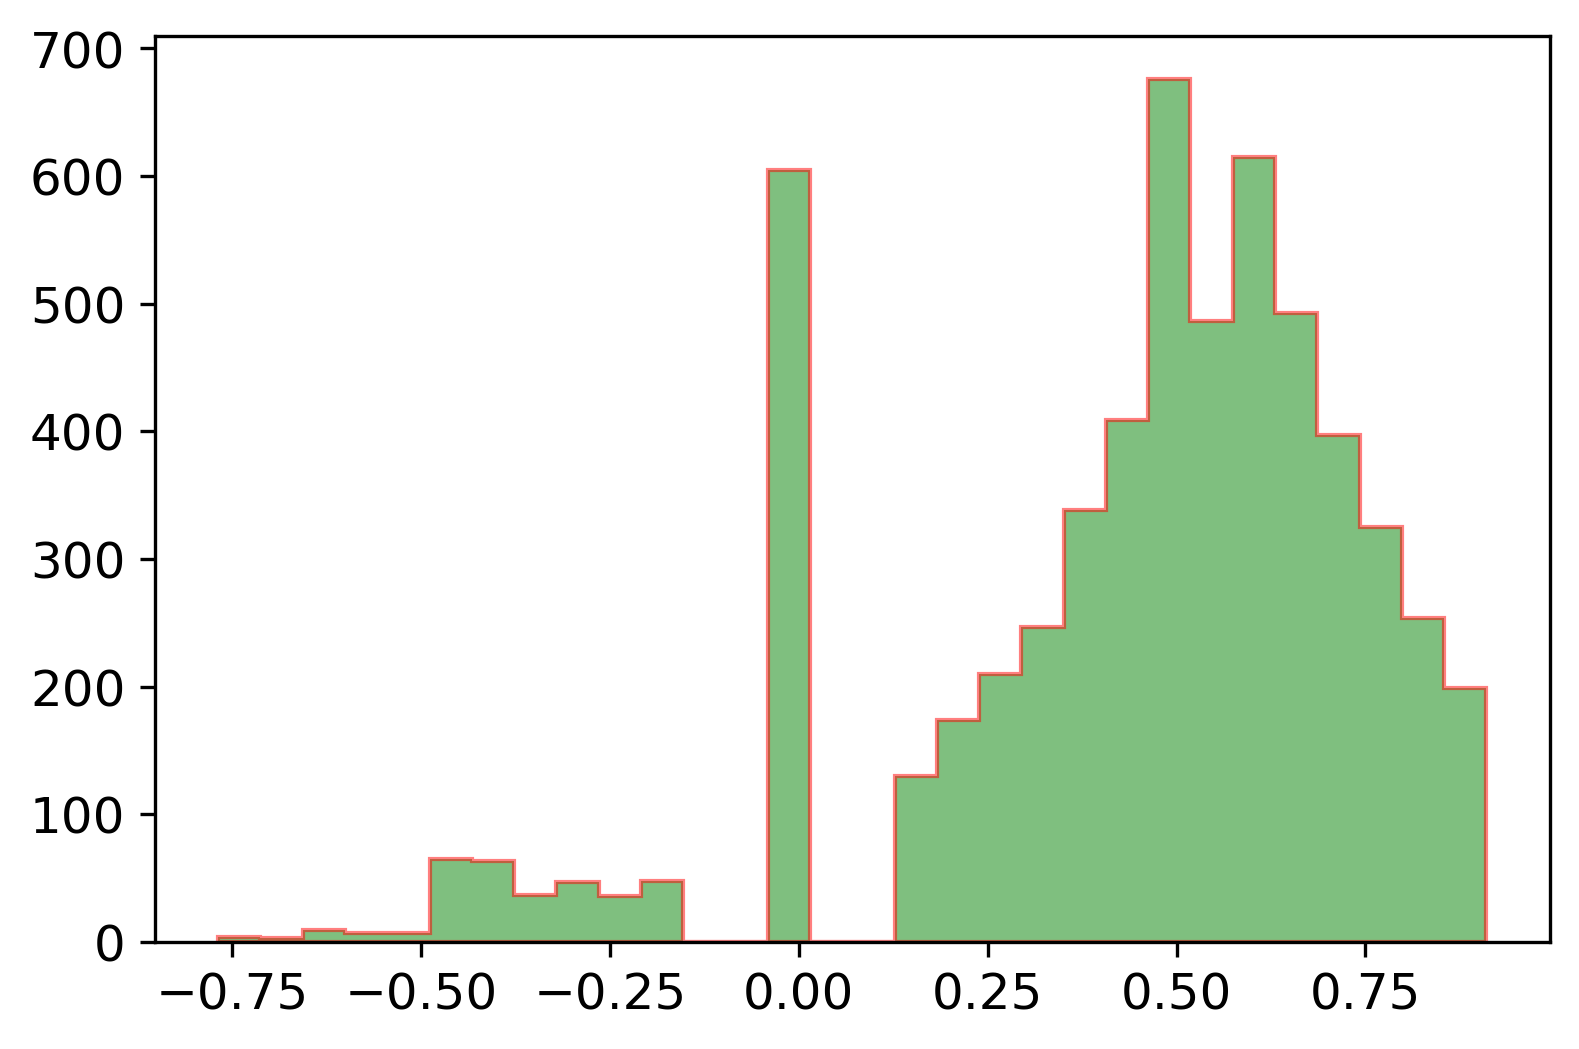

In [195]:
###right skewness 

#trying to fix by taking cube roots

x=np.cbrt(sulfurDiOxide2020New['arithmetic_mean'])
plt.hist(x, bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red')


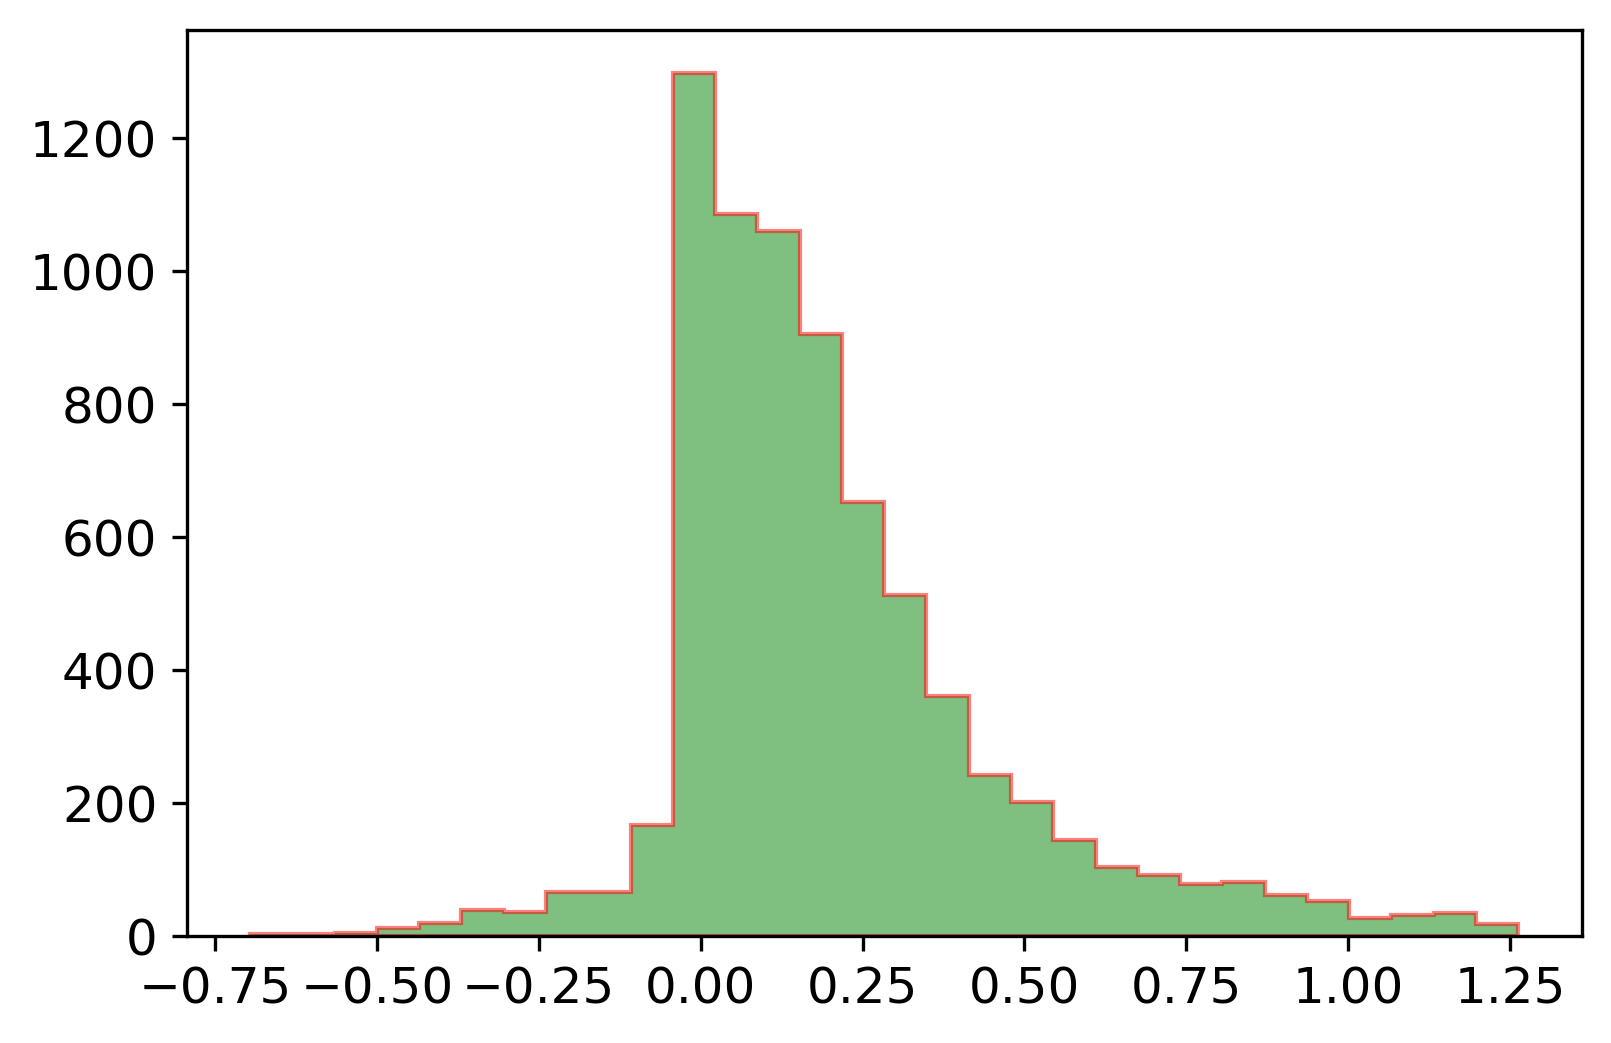

In [246]:
plt.hist(sulfurDiOxide2020New['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

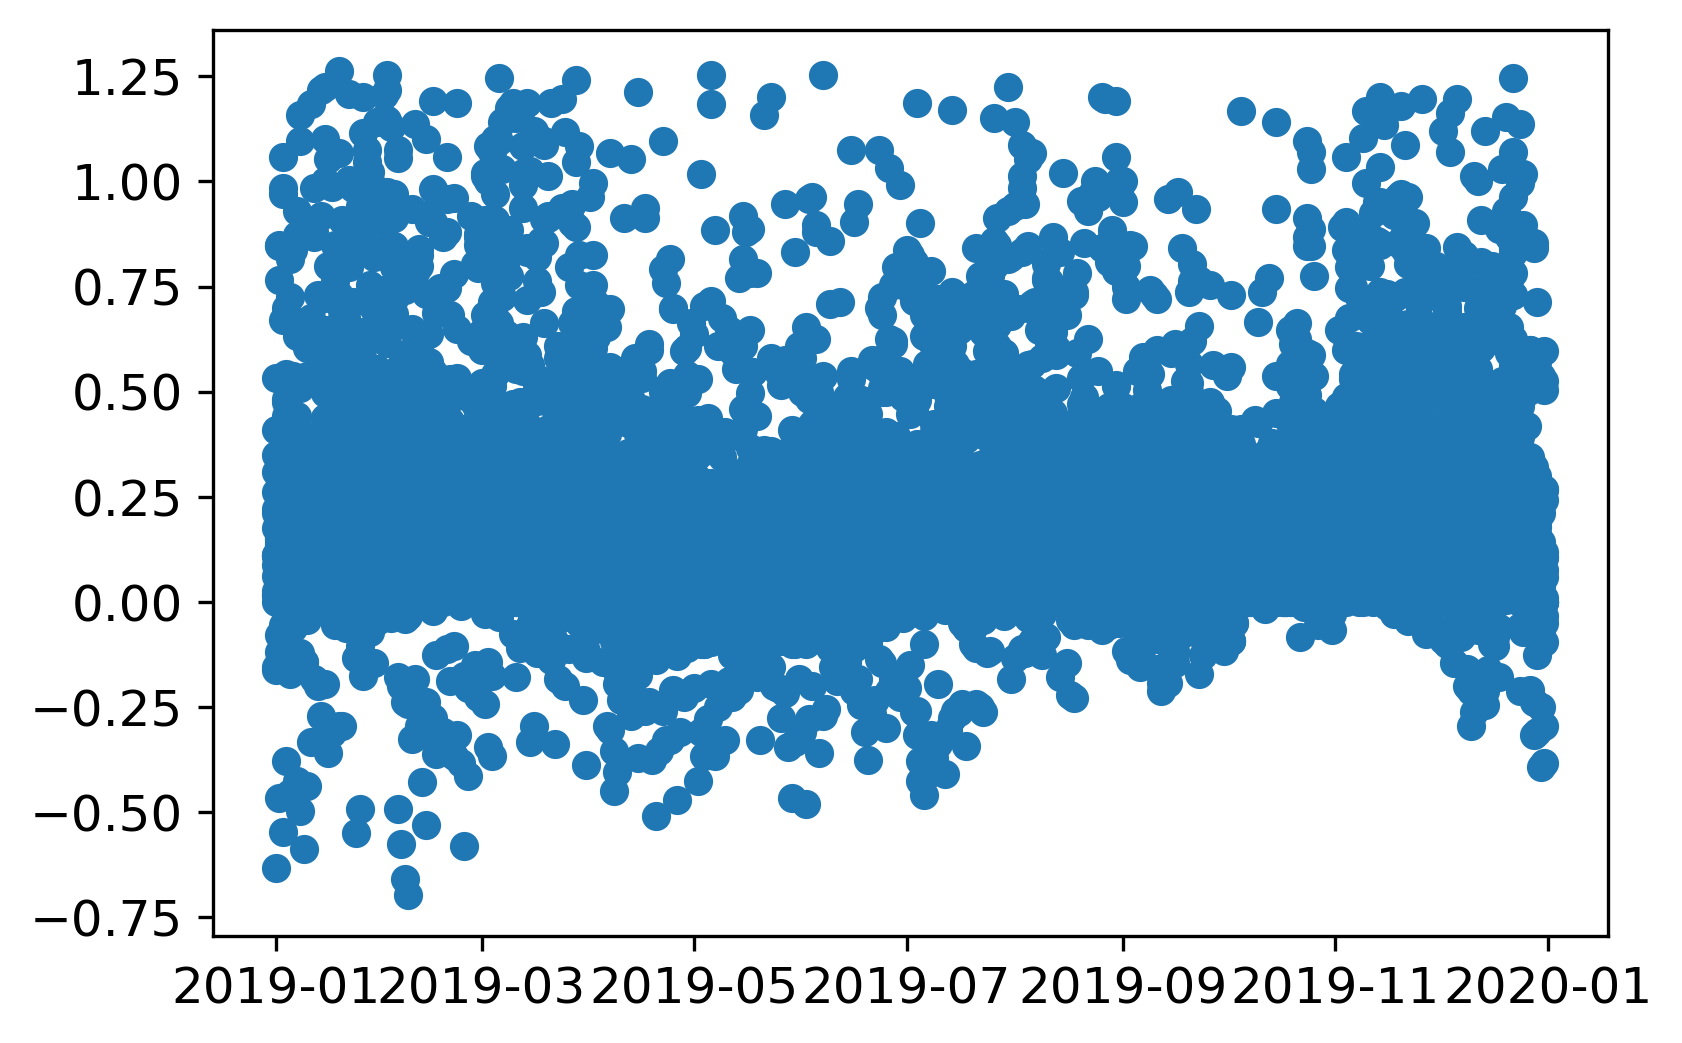

In [247]:
#group by date and average
plt.scatter(x=sulfurDiOxide2020New['date_local'], y=sulfurDiOxide2020New['arithmetic_mean'])

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


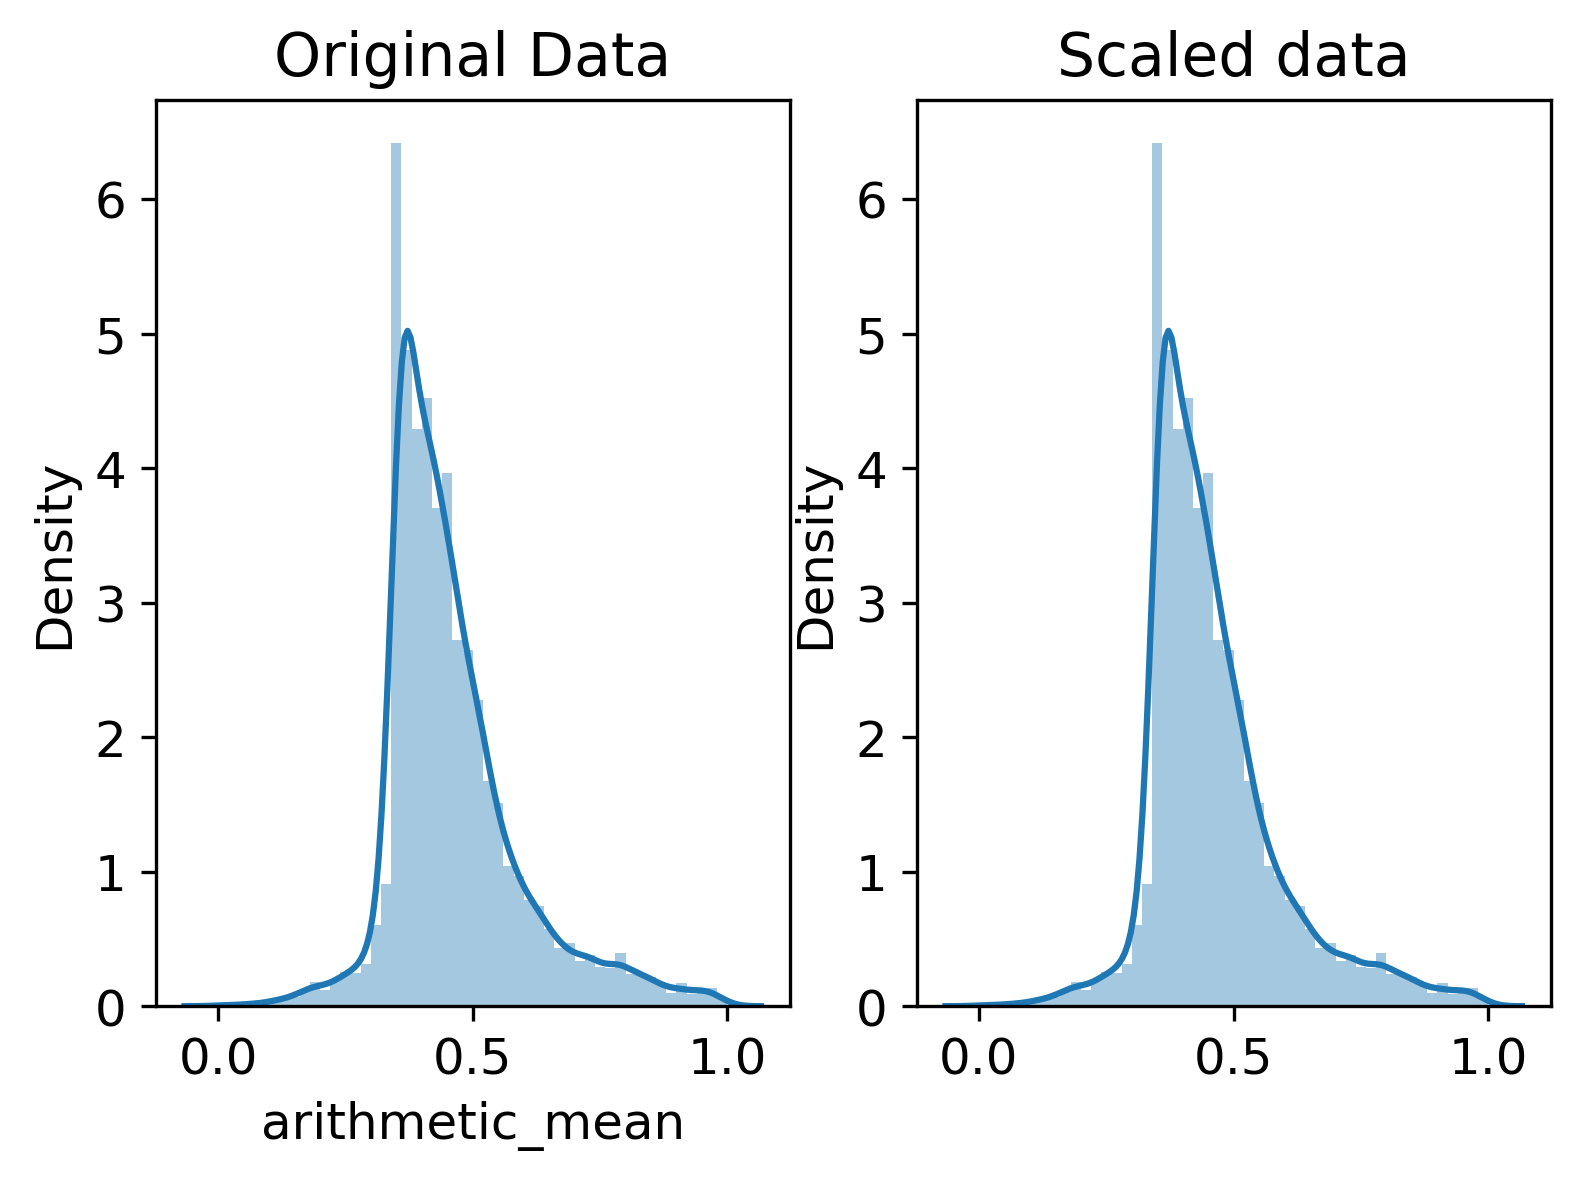

In [249]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sulfurDiOxide2020New['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(sulfurDiOxide2020New['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
sulfurDiOxide2020New['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

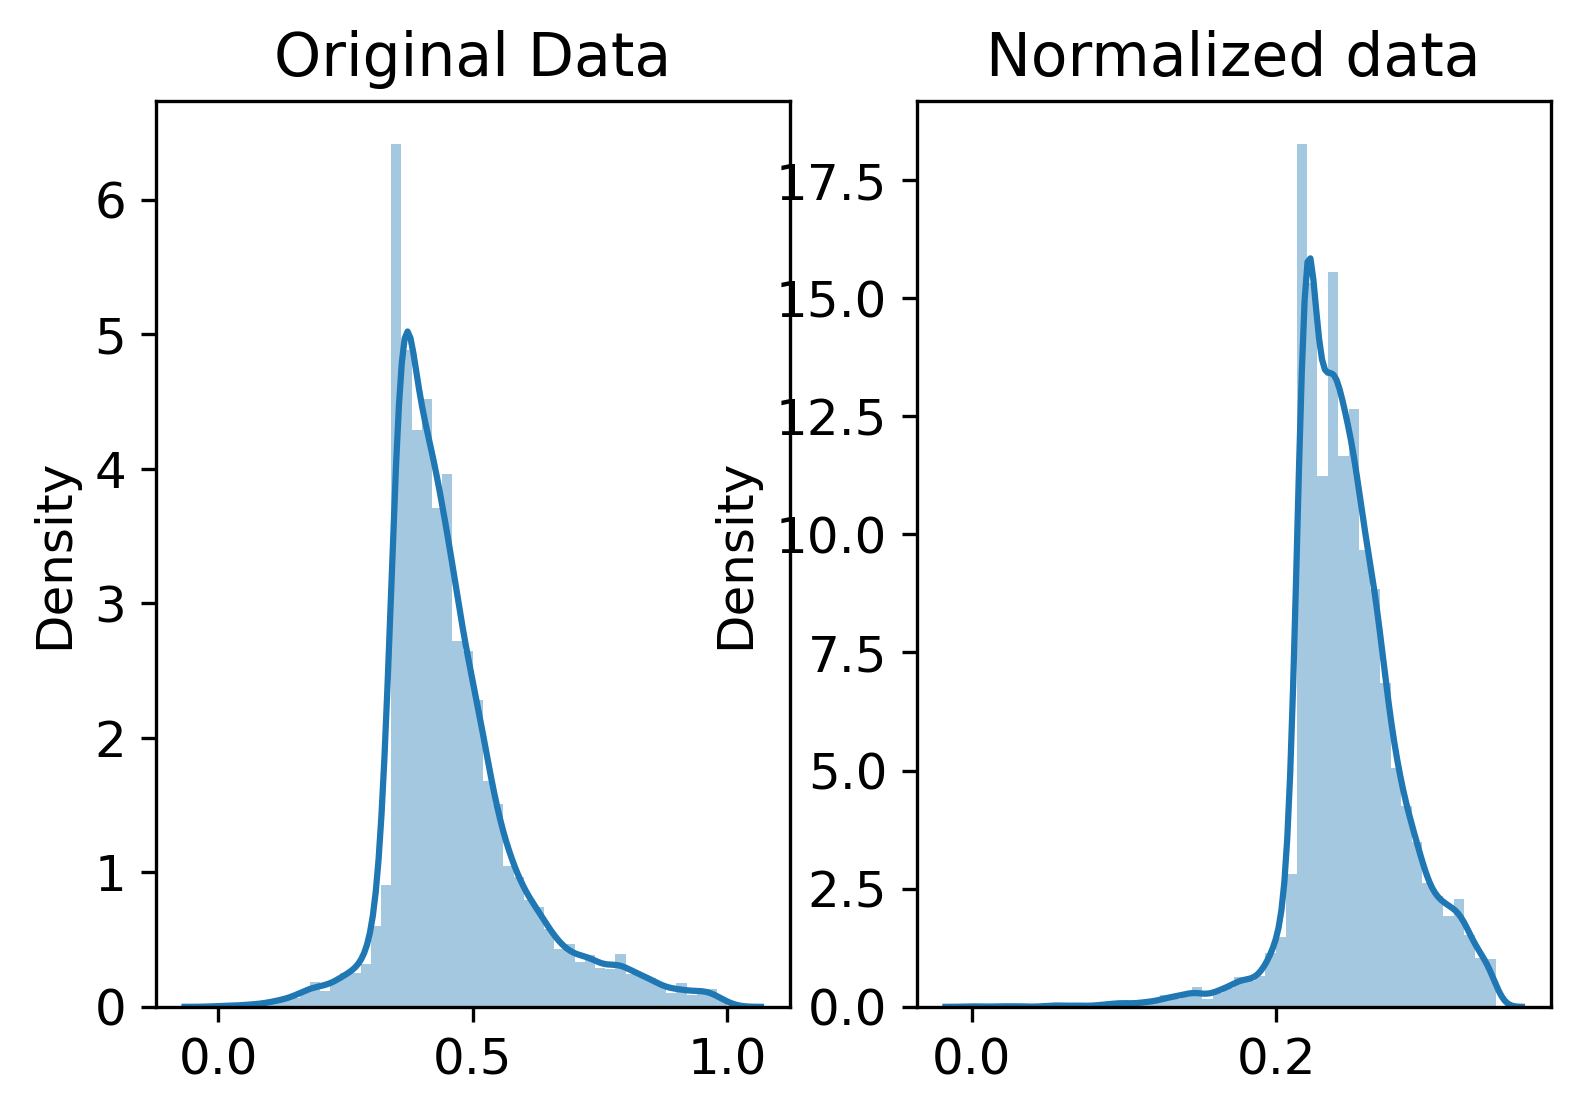

In [250]:
normalized_data = stats.yeojohnson(sulfurDiOxide2020New['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")


#need to add normalized data back to dataframe

In [ ]:
sulfurDiOxide2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/sulfur_di_oxide2020.csv')